In [76]:
import itertools, os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import astropy.io.ascii as at
from astropy import table
from scipy.interpolate import interp1d
from astroquery.simbad import Simbad


In [77]:
poster_figure = (12,7)
talk_figure = (10,6.5)
single_figure = (8,8)
double_figure = (13,6)
double_stacked = (6,13)
triple_stacked = (6,14)
quad_square = (13,10)
proposal_figure = (10,5.5)

std_ms = 9
std_mew = 1.5

In [138]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = single_figure
mpl.rcParams['lines.markeredgewidth'] = 1.5
mpl.rcParams['lines.markersize'] = 8
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.direction'] = "in"
# mpl.rcParams[''] = 


# mpl.rcParams['axes.prop_cycle'] = cycler('color',cmap_qual)

In [79]:
model_dir = os.path.expanduser("~/Dropbox/Models/")
cat_dir = os.path.expanduser("~/Dropbox/data/catalogs/")

# Set up necessary conversions to stellar mass

In [80]:
kh = at.read(os.path.join(model_dir,"kraushillenbrand5.dat"))
print(kh.dtype)

[('SpT', '<U2'), ('Mu', '<f8'), ('Mg', '<f8'), ('Mr', '<f8'), ('Mi', '<f8'), ('Mz', '<f8'), ('MJ', '<f8'), ('MH', '<f8'), ('MK', '<f8'), ('Mbol', '<f8'), ('Teff', '<i8'), ('Mass', '<f8')]


In [81]:
kh_teff_mass = interp1d(kh["Teff"],kh["Mass"],bounds_error=False)
kh_jk_mass = interp1d(kh["MJ"]-kh["MK"],kh["Mass"],bounds_error=False)
kh_gr_mass = interp1d(kh["Mg"]-kh["Mr"],kh["Mass"],bounds_error=False)

In [82]:
# main sequence
# pm_table = at.read(os.path.join(model_dir,"pecaut_mamajek_2013_table5.dat"),data_start=3)
pm_table = at.read(os.path.join(model_dir,"mamajek_colors.dat"),fill_values=[("...","0")])
print(pm_table.dtype)
pm_mass = pm_table["Msun"]
# pm_mass = kh_teff_mass(pm_table["Teff"])
# # print(pm_mass)
good = np.isfinite(pm_mass)
# print(pm_mass[good])
# print(pm_table["B-V"][good])

[('SpT', '<U5'), ('Teff', '<i8'), ('logT', '<f8'), ('BCv', '<f8'), ('logL', '<f8'), ('Mbol', '<f8'), ('R_Rsun', '<f8'), ('Mv', '<f8'), ('B-V', '<f8'), ('Bt-Vt', '<f8'), ('G-V', '<f8'), ('Bp-Rp', '<f8'), ('G-Rp', '<f8'), ('M_G', '<f8'), ('b-y', '<f8'), ('U-B', '<f8'), ('V-Rc', '<f8'), ('V-Ic', '<f8'), ('V-Ks', '<f8'), ('J-H', '<f8'), ('H-Ks', '<f8'), ('M_J', '<f8'), ('M_Ks', '<f8'), ('Ks-W1', '<f8'), ('W1-W2', '<f8'), ('W1-W3', '<f8'), ('W1-W4', '<f8'), ('g-r', '<f8'), ('i-z', '<f8'), ('z-Y', '<f8'), ('Msun', '<f8'), ('SpT2', '<U5')]


In [83]:
pm_bv_mass = interp1d(pm_table["B-V"][good],pm_mass[good],bounds_error=False)
pm_vk_mass = interp1d(pm_table["V-Ks"][good],pm_mass[good],bounds_error=False)
pm_vi_mass = interp1d(pm_table["V-Ic"][good],pm_mass[good],bounds_error=False)
pm_vi_bv = interp1d(pm_table["V-Ic"][good],pm_table["B-V"][good],bounds_error=False)

In [84]:
sol_lim = {"mass":[0.8,1.2], "V-K": [1.1,1.8], "B-V": [0.5,0.8], "logTeff": [3.7,3.8]}

In [85]:
godoy_rivera = at.read(os.path.join(cat_dir,"godoyrivera2021_rotation.dat"),data_start=3)
godoy_rivera.dtype
memb = (godoy_rivera["Class"]=="probable-member") | (godoy_rivera["Class"]=="possible-member")

In [86]:
curtis = at.read(os.path.join(cat_dir,"curtis2020_rotation.dat"),data_start=3)
curtis.dtype

dtype([('Cluster', '<U12'), ('Age', '<f8'), ('Av', '<f8'), ('GaiaDR2', '<i8'), ('OName', '<U14'), ('RA_ICRS', '<f8'), ('DE_ICRS', '<f8'), ('BP-RP', '<f8'), ('(BP-RP)0', '<f8'), ('Gmag', '<f8'), ('GMag', '<f8'), ('Teff', '<f8'), ('Prot', '<f8'), ('R147', '<i8'), ('Simbad', '<U6'), ('_RA.icrs', '<f8'), ('_DE.icrs', '<f8')])

# Read in cluster data

In [87]:
customSimbad = Simbad()
customSimbad.add_votable_fields("typed_id",
                               "ids","parallax","ubv","mk","sptype",
                               "flux(B)","flux_qual(B)",
                               "flux(V)","flux_qual(V)",
                               "flux(G)","flux_qual(G)")

In [88]:
# Compilation of various periods from the pre-MRT era
old = at.read(os.path.join(cat_dir,"old_rotation_literature_compilation.csv"))
old.dtype

old["V"] = np.zeros(len(old))*np.nan
old["B"] = np.zeros(len(old))*np.nan
old["B-V"] = np.zeros(len(old))*np.nan

for i in np.where(old["SimbadName"].mask==False)[0]:
    result_table = customSimbad.query_object(old["SimbadName"][i])
    old["B"][i] = result_table["FLUX_B"][0]
    old["V"][i] = result_table["FLUX_V"][0]
    old["B-V"][i] = result_table["FLUX_B"][0] - result_table["FLUX_V"][0]

/Users/douglste/anaconda3/lib/python3.8/site-packages/astropy/table/column.py:1125: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value
/Users/douglste/anaconda3/lib/python3.8/site-packages/astropy/table/column.py:1125: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value
/Users/douglste/anaconda3/lib/python3.8/site-packages/astropy/table/column.py:1125: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value
/Users/douglste/anaconda3/lib/python3.8/site-packages/astropy/table/column.py:1125: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value
/Users/douglste/anaconda3/lib/python3.8/site-packages/astroquery/simbad/core.py:135: UserWarning: Warning: The script line number 3 raised an error (recorded in the `errors` attribute of the result table): Identifier not found in the database : Cl* Melotte   22    HII   15351
  warnings.warn("Warning: The script line numbe

In [89]:
old["Mass"] = pm_bv_mass(old["B-V"])

In [90]:
old.show_in_notebook()

idx,Name,SimbadName,Prot (d),Population,citekey,ads_ref,Notes,V,B,B-V,Mass
0,BY Dra,V* BY Dra,3.826,Field,bopp1973,1973MNRAS.164..343B,--,nan,9.229999542236328,nan,nan
1,CC Eri,V* CC Eri,1.56145,Field,evans1971,1971MNRAS.154..329E,Appears to be synchronized? No actual photometric period specified separately,8.864999771118164,10.201000213623047,1.3360004425048828,0.6419997787475586
2,BD+34 106,V* FF And,3.92,Field,krzeminski1967,1967AJ.....72R.307K,--,nan,11.84000015258789,nan,nan
3,HDE 234677,V* BY Dra,3.83,Field,krzeminski1967,1967AJ.....72R.307K,--,nan,9.229999542236328,nan,nan
4,AC+31 70565,V* GT Peg,4.65,Field,krzeminski1967,1967AJ.....72R.307K,--,nan,nan,nan,nan
5,HD 197481,--,4.865,--,torres1972,1972ApL....11...13T,--,nan,nan,nan,nan
6,Hz 1883,Cl* Melotte 22 HII 1883,0.24,Pleiades,vanleeuwen1982,1982Msngr..28...15V,Simbad uses HII for the Hertzprung Catalog,12.600000381469727,13.65999984741211,1.0599994659423828,0.7450002670288086
7,Hz 686,Cl* Melotte 22 HII 686,0.4,Pleiades,vanleeuwen1982,1982Msngr..28...15V,Simbad uses HII for the Hertzprung Catalog,13.359999656677246,14.630000114440918,1.2700004577636719,0.674999771118164
8,Hz 3163,Cl* Melotte 22 HII 3163,0.42,Pleiades,vanleeuwen1982,1982Msngr..28...15V,Simbad uses HII for the Hertzprung Catalog,12.6899995803833,13.670000076293945,0.9800004959106445,0.7837733977695681
9,Hz 1531,Cl* Melotte 22 HII 15351,0.48,Pleiades,vanleeuwen1982,1982Msngr..28...15V,Simbad uses HII for the Hertzprung Catalog,nan,nan,nan,nan


## Now actual clusters

In [91]:
onc1 = at.read(os.path.join(cat_dir,"ONC_rotation_herbst2002_compilation.tsv"),data_start=3)
print(onc1.dtype)
onc_per = np.asarray(onc1["Per"])
onc_mass = np.asarray(onc1["Mass"])

[('ID', '<i8'), ('Per', '<f8'), ('r_Per', '<U4'), ('LogT', '<f8'), ('LogL', '<f8'), ('Mass', '<f8'), ('Delta(I-K)', '<f8'), ('H97', '<U3')]


In [92]:
ngc6530 = at.read(os.path.join(cat_dir,"ngc6530_rotation_henderson2012.tsv"),data_start=3)
print(ngc6530.dtype)
ngc6530_mass = ngc6530["Mass"]
ngc6530_per = ngc6530["Per"]

[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('XID', '<i8'), ('WFI', '<i8'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('Vmag', '<f8'), ('Imag', '<f8'), ('Per', '<f8'), ('u_Per', '<U1'), ('Mass', '<f8'), ('Age', '<f8'), ('Lbol', '<f8'), ('Rad', '<f8'), ('logLX', '<f8'), ('IR?', '<U1'), ('Ha', '<U1'), ('r_Ha', '<U1'), ('SB2?', '<U1'), ('P', '<i8'), ('Simbad', '<U6')]


In [93]:
ngc2362 = at.read(os.path.join(cat_dir,"ngc2362_rotation_irwin2008b.csv"),data_start=3)
print(ngc2362 .dtype)
# ceph = ceph[(ceph["f_Per"]=="OO") & (ceph["f_V-I"]=="OO")]
ngc2362_per = ngc2362["Per"]
ngc2362_mass = ngc2362["Mass"]

[('[IHA2008b]', '<U13'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ('Vmag', '<f8'), ('Imag', '<f8'), ('Per', '<f8'), ('iamp', '<f8'), ('Mass', '<f8'), ('Rad', '<f8'), ('[3.6]', '<f8'), ('[4.5]', '<f8'), ('[5.8]', '<f8'), ('[8.0]', '<f8')]


In [94]:
usco = at.read(os.path.join(cat_dir,"usco_rhooph_rotation_rebull2018.csv"),data_start=3)
print(usco.dtype)
usco_memb = (usco["Memb"]=="USco,bronze") | (usco["Memb"]=="USco,silver") | (usco["Memb"]=="USco,gold") 
usco_mass = pm_vk_mass(np.asarray(usco["(V-Ks)0"][usco_memb]))
usco_per = usco["Per1"][usco_memb]

[('EPIC', '<i8'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ('OName', '<U29'), ('Vmag', '<f8'), ('Ksmag', '<f8'), ('(V-Ks)o', '<f8'), ('(V-Ks)u', '<f8'), ('E(V-Ks)', '<f8'), ('Ksmag0', '<f8'), ('(V-Ks)0', '<f8'), ('n_(V-Ks)', '<i8'), ('n_(V-Ks)0', '<i8'), ('Per1', '<f8'), ('Per2', '<f8'), ('Per3', '<f8'), ('Per4', '<f8'), ('Memb', '<U11'), ('Disk', '<U5'), ('DStart', '<U10'), ('Dip', '<U3'), ('Burst', '<U3'), ('Multi', '<U6'), ('DD', '<U3'), ('DDmove', '<U3'), ('Shch', '<U3'), ('Beat', '<U3'), ('CPeak', '<U3'), ('RClose', '<U3'), ('RDist', '<U3'), ('Pulse', '<U3'), ('SimbadName', '<U14')]


In [95]:
hper = at.read(os.path.join(cat_dir,"hper_rotation_moraux2013.tsv"),data_start=3)
print(hper.dtype)
hper_mass = hper["Mass"]
hper_per = hper["Per"]

[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('Seq', '<i8'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ("i'mag", '<f8'), ('Per', '<f8'), ('Power', '<f8'), ('l_FAP', '<U1'), ('FAP', '<f8'), ('Amp', '<f8'), ('Mass', '<f8'), ('bin', '<i8'), ('Vmag', '<f8'), ('Icmag', '<f8'), ('Jmag', '<f8'), ('Hmag', '<f8'), ('Kmag', '<f8'), ('Mmb', '<i8'), ('XH', '<U4')]


In [96]:
ic2391 = at.read(os.path.join(cat_dir,"IC2391_rotation_patten1996.csv"))
ic2391_mass = pm_vi_mass(ic2391["V-I"])
ic2391_per = ic2391["Period"]

In [97]:
ic2602 = at.read(os.path.join(cat_dir,"IC2602_rotation_barnes1999.csv"))
ic2602_mass = pm_bv_mass(ic2602["B-V"])
ic2602_per = ic2602["Prot"]

In [98]:
ngc2547 = godoy_rivera[(godoy_rivera["Cluster"]=="NGC2547") & memb]
ngc2547_per = ngc2547["Period"]
ngc2547_mass = ngc2547["Mass"]

In [99]:
zams = at.read(os.path.expanduser("~/projects/TESS_young/tab_all_stars.csv"))
good = zams["Q1"]==0
zams_mass = zams["Mass"][good]
zams_per = zams["Prot1"][good]

In [100]:
alphaper = at.read(os.path.join(cat_dir,"alphaper_rotation_alejo.csv"))
print(alphaper.dtype)
good = (alphaper["Pmem"]>=60)
alphaper_per = alphaper["Prot"][good]
alphaper_mass = alphaper["mass"][good]

[('name', '<U7'), ('Identifier', '<U23'), ('RA', '<f8'), ('DEC', '<f8'), ('Pmem', '<f8'), ('R mag', '<f8'), ('Ks', '<f8'), ('z', '<f8'), ('K', '<f8'), ('mass', '<f8'), ('tau', '<f8'), ('Prot', '<f8'), ('r_Prot', '<U10'), ('binary?', '<U3')]


In [101]:
ap_old = at.read(os.path.join(cat_dir,"alphaPer_rotation_prosser1997.tsv"),data_start=3)
o2 = old["citekey"]=="prosser1993"

ap_old_bv = np.append(ap_old["B-V"],old["B-V"][o2])
ap_old_per = np.append(ap_old["Prot"],old["Prot (d)"][o2])
ap_old_mass = np.append(pm_bv_mass(ap_old["B-V"]),old["Mass"][o2])

In [102]:
m35 = at.read(os.path.join(cat_dir,"M35_rotation_meibom2010.tsv"),
              delimiter="|",fill_values=("-99",np.nan)).filled(np.nan)
print(m35.dtype)
m35_solar = (m35["(B-V)0"]>=sol_lim["B-V"][0]) & (m35["(B-V)0"]<=sol_lim["B-V"][1])
m35_per = m35["Prot"]
m35_mass = pm_bv_mass(m35["(B-V)0"])

[('Seq', '<i8'), ('Prot', '<f8'), ('V0mag', '<f8'), ('(B-V)0', '<f8'), ('(V-I)0', '<f8'), ('o_RV', '<U2'), ('RV', '<f8'), ('e_RV', '<f8'), ('Mrv', '<U2'), ('Mpm', '<i8'), ('Mmb', '<U5'), ('W', '<f8'), ('State', '<U1'), ('Simbad', '<U6'), ('RAJ2000', '<U12'), ('DEJ2000', '<U13')]


In [103]:
pleiades = godoy_rivera[(godoy_rivera["Cluster"]=="Pleiades") & memb]
pleiades_per = pleiades["Period"]
pleiades_mass = pleiades["Mass"]

In [104]:
o2 = (old["citekey"]=="krishnamurthi1998") | (old["citekey"]=="vanleeuwen1987")

plei_old_per = old["Prot (d)"][o2]
plei_old_mass = old["Mass"][o2]
plei_old_bv = old["B-V"][o2]

In [148]:
old[o2].show_in_notebook()

idx,Name,SimbadName,Prot (d),Population,citekey,ads_ref,Notes,V,B,B-V,Mass
0,HCG 20,Cl* Melotte 22 HCG 20,2.7,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,14.229999542236328,15.600000381469727,1.3700008392333984,0.6143236438648121
1,HCG 71,Cl* Melotte 22 HCG 71,2.98,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,14.479999542236328,15.890000343322754,1.4100008010864258,0.5799991989135741
2,HII 133,Cl* Melotte 22 HII 133,1.36,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,14.300000190734863,15.680000305175781,1.380000114440918,0.6062161234262827
3,HII 191,Cl* Melotte 22 HII 191,3.1,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,nan,16.0,nan,nan
4,HII 263,Cl* Melotte 22 HII 263,4.82,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,11.539999961853027,12.420000076293945,0.880000114440918,0.8259257563838251
5,HII 345,Cl* Melotte 22 HII 345,0.84,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,11.461000442504883,12.288000106811523,0.8269996643066406,0.8746343100943216
6,HII 738,Cl* Melotte 22 HII 738,0.83,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,12.40999984741211,13.520000457763672,1.1100006103515625,0.7199996948242188
7,HII 883,Cl* Melotte 22 HII 883,7.2,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,13.020000457763672,14.140000343322754,1.119999885559082,0.7150000572204589
8,HII 930,Cl* Melotte 22 HII 930,1.39,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,14.220000267028809,15.59000015258789,1.369999885559082,0.6143244171142578
9,HII 1032,Cl* Melotte 22 HII 1032,1.31,Pleiades,krishnamurthi1998,1998ApJ...493..914K,--,11.100000381469727,11.850000381469727,0.75,0.9222222222222222


In [105]:
m50 = godoy_rivera[(godoy_rivera["Cluster"]=="M50") & memb]
m50_per = m50["Period"]
m50_mass = m50["Mass"]

In [106]:
ngc2516 = godoy_rivera[(godoy_rivera["Cluster"]=="NGC 2516") & memb]
ngc2516_per = ngc2516["Period"]
ngc2516_mass = ngc2516["Mass"]

In [107]:
m34meibom = at.read(os.path.join(cat_dir,"m34_rotation_meibom2011.tsv"))
print(m34meibom.dtype)
m34meibom_mass = pm_bv_mass(np.asarray(m34meibom["(B-V)0"][2:],np.float32))
m34meibom_per = np.asarray(m34meibom["Prot"][2:],np.float32)

[('Seq', '<U3'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ('Prot', '<U5'), ('V0mag', '<U5'), ('(B-V)0', '<U5'), ('o_RVel', '<U2'), ('RVel', '<U5'), ('e_RVel', '<U4'), ('PRV', '<U2'), ('PPM', '<U2'), ('Mm', '<U2'), ('Rot', '<U1'), ('JP96', '<U3')]


In [108]:
m34 = at.read(os.path.join(cat_dir,"m34_rotation_irwin2006.tsv"))
print(m34.dtype)
m34_mass = np.asarray(m34["Mass"][2:],np.float32)
m34_per = np.asarray(m34["Per"][2:],np.float32)
# print(m34_mass,m34_per)

[('M34', '<U6'), ('RAJ2000', '<U11'), ('DEJ2000', '<U11'), ('Vmag', '<U5'), ('Rcmag', '<U5'), ('Icmag', '<U5'), ('Hamag', '<U5'), ('Per', '<U6'), ('n_Per', '<U1'), ('AV', '<U6'), ('AI', '<U6'), ('Mass', '<U7'), ('Rad', '<U6'), ('JP', '<U3'), ('vsini', '<U4')]


In [109]:
ngc3532 = at.read(os.path.join(cat_dir,"ngc3532_rotation_fritzewski2021.dat"),
                  data_start=3)
ngc3532_per = ngc3532["Prot"]
ngc3532_mass = pm_bv_mass(ngc3532["(B-V)0"])

In [110]:
coma = at.read(os.path.join(cat_dir,"comaber_rotation_colliercameron2009_consolidated.csv"))
print(coma.dtype)
coma_per = coma["Period(days)"]
coma_mass = kh_jk_mass(coma["J-K"])

[('1SWASP', '<U19'), ('Season', '<i8'), ('Field_cam', '<U15'), ('Nobs', '<i8'), ('Period(days)', '<f8'), ('Period2(days)', '<f8'), ('Half?', '<U1'), ('Amplitude(mag)', '<f8'), ('SpT', '<U2'), ('J-K', '<f8')]


In [111]:
m37 = at.read(os.path.join(cat_dir,"M37_rotation_nunez2015_clean.tsv"),
             delimiter="|")
solar37 = (m37["Mass"]>=sol_lim["mass"][0]) & (m37["Mass"]<=sol_lim["mass"][1])
m37_per = m37["Per"]#[solar37]
print(m37.dtype)
m37_mass = m37["Mass"]

[('OID', '<i8'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('gmag', '<f8'), ('rmag', '<f8'), ('imag', '<f8'), ('Per', '<f8'), ('f_Per', '<f8'), ('Ps', '<f8'), ('Pb', '<f8'), ('Pmem', '<f8'), ('Mass', '<f8'), ('tau', '<f8'), ('Lbol', '<f8'), ('XID', '<i8'), ('O-X', '<f8'), ('ME08', '<i8'), ('oME08', '<f8'), ('OName', '<i8')]


In [112]:
ngc6866 = at.read(os.path.join(cat_dir,"ngc6866_rotation_balona2013.tsv"),
             delimiter="|")
print(ngc6866.dtype)
solar6866 = (ngc6866["logTe"]>=sol_lim["logTeff"][0]) & (ngc6866["logTe"]<=sol_lim["logTeff"][1])
ngc6866_per = 2 * np.pi / ngc6866["f1"]
ngc6866_mass = kh_teff_mass(10**ngc6866["logTe"])

[('X', '<i8'), ('KIC', '<i8'), ('Mm', '<U1'), ('JJ', '<i8'), ('Dist', '<f8'), ('RAJ2000', '<U8'), ('DEJ2000', '<U9'), ('Cad', '<U1'), ('kepmag', '<f8'), ('logTe', '<f8'), ('logL', '<f8'), ('f1', '<f8'), ('Amp', '<f8')]


In [113]:
# PRAESEPE 
praesepe = curtis[curtis["Cluster"]=="Praesepe"]
praesepe_per = praesepe["Prot"]
praesepe_mass = kh_teff_mass(praesepe["Teff"])

In [114]:
# PRAESEPE 
prae1 = at.read(os.path.join(cat_dir,"Praesepe_Periods_Douglas2017_Tab3_mrt.dat"))
prae2 = at.read(os.path.join(cat_dir,"Praesepe_Periods_Douglas2019_Tab4_mrt.txt"))
prae3 = at.read(os.path.join(cat_dir,"Praesepe_rotation_Rampalli_2021.csv"))

sub1 = prae1["EPIC","Prot1","Prot-Flag","PTF-Prot","SWASP-Prot","Scholz-Prot","Kovacs-Prot"]
prae = table.join(prae2[prae2["EPIC"].mask==False],sub1)
prae_mass = kh_teff_mass(np.asarray(prae["Teff"]))

prae["Prot_Year"] = np.ones(len(prae))*9999
prae["Prot_Year"][prae["Prot-Flag"]=="2"] = 2017
prae["Prot_Year"][prae["Prot-Flag"]=="K"] = 2014
prae["Prot_Year"][prae["Prot-Flag"]=="D"] = 2011
prae["Prot_Year"][prae["Prot-Flag"]=="P"] = 2011
prae["Prot_Year"][prae["Prot-Flag"]=="S"] = 2007
prae_year = prae["Prot_Year"]

prae_per = prae["Prot1"]
for colname in ["Kovacs-Prot","SWASP-Prot","PTF-Prot","Scholz-Prot"]:
    need_per = (prae_per.mask==False) & (prae[colname].mask==False)
    prae_per[need_per] = prae[colname][need_per]
    prae_per.mask[need_per] = False

k2_new = (prae3["Prot"]>0) & (prae3["PreviousProt"].mask==True) #& (prae3["PreviousProt"]<0)
prae_per3 = prae3["Prot"][k2_new]
prae_mass3 = kh_teff_mass(np.asarray(prae3["Teff"][k2_new]))

In [115]:
# HYADES
hfile1 = at.read(os.path.join(cat_dir,"Hyades_Periods_Douglas2016_Tab4_mrt.dat"))
hfile2 = at.read(os.path.join(cat_dir,"Hyades_Periods_Douglas2019_Tab3_mrt.txt"))

hfile2["Prot_Year"] = np.ones(len(hfile2))*9999
hfile2["Prot_Year"][hfile2["Prot1"].mask==False] = 2019
hfile2["Prot_Year"][hfile2["Prot4"].mask==False] = 2016
hfile2["Prot_Year"][hfile2["ProtA"].mask==False] = 2014
hfile2["Prot_Year"][hfile2["ProtH"].mask==False] = 2011
hfile2["Prot_Year"][hfile2["ProtD"].mask==False] = 2011
hfile2["Prot_Year"][hfile2["ProtP"].mask==False] = 1995
hfile2["Prot_Year"][hfile2["ProtR"].mask==False] = 1987

hyad_mass = hfile2["Mass"]
hyad_per = hfile2["Prot1"]
hyad_year = hfile2["Prot_Year"]
for colname in ["Prot4","ProtA","ProtH","ProtD","ProtP","ProtR"]:
    need_per = (hyad_per.mask==True) & (hfile2[colname].mask==False)
    hyad_per[need_per] = hfile2[colname][need_per]
    hyad_per.mask[need_per] = False

In [116]:
ngc6811 = curtis[curtis["Cluster"]=="NGC 6811"]
ngc6811_per = ngc6811["Prot"]
ngc6811_mass = kh_teff_mass(ngc6811["Teff"])

In [117]:
ngc752 = curtis[curtis["Cluster"]=="NGC 752"]
ngc752_per = ngc752["Prot"]
ngc752_mass = kh_teff_mass(ngc752["Teff"])

In [118]:
rup147 = curtis[curtis["Cluster"]=="Ruprecht 147"]
rup147_per = rup147["Prot"]
rup147_mass = kh_teff_mass(rup147["Teff"])

In [119]:
ngc6819 = curtis[curtis["Cluster"]=="NGC 6819"]
ngc6819_per = ngc6819["Prot"]
ngc6819_mass = kh_teff_mass(ngc6819["Teff"])

In [120]:
m67 = at.read(os.path.join(cat_dir,"M67_rotation_barnes2017.txt"),delimiter="\t")
print(m67.dtype)
m67_per = m67["P"]
m67_mass = pm_bv_mass(m67["B - V"])

[('EPIC', '<i8'), ('IDW', '<i8'), ('B - V', '<f8'), ('V', '<f8'), ('P', '<f8'), ('P_err', '<f8'), ('Groups', '<U5'), ('Member', '<U2'), ('Comment', '<U24')]


In [121]:
m67_2 = at.read(os.path.join(cat_dir,"m67_rotation_dungee2022.csv"))
m67_per2 = m67_2["prot"]
m67_mass2 = kh_teff_mass(m67_2["teff"])

In [122]:
mearth = at.read(os.path.join(cat_dir,"mearth_rotation_newton2018.tsv"),data_start=3)
print(mearth.dtype)
good = (mearth["Type"]=="A") | (mearth["Type"]=="B")
mearth_per = np.asarray(mearth["Per"][good],np.float32)
# mearth_mass = np.asarray(mearth["Mass"][good],np.float32)
mearth_mass = np.asarray(mearth["M*"][good],np.float32)

[('Type', '<U1'), ('2MASS', '<U16'), ('LSPM', '<U10'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('pmRA', '<f8'), ('pmDE', '<f8'), ('plx', '<f8'), ('e_plx', '<f8'), ('r_plx', '<U19'), ('Dist', '<f8'), ('RV', '<f8'), ('e_RV', '<f8'), ('r_RV', '<U19'), ('Per', '<f8'), ('Amp', '<f8'), ('e_Amp', '<f8'), ('M*', '<f8'), ('R*', '<f8'), ('Flag', '<i8'), ('NPts', '<i8'), ('NDays', '<i8'), ('magerr', '<f8'), ('F-test', '<i8'), ('Simbad', '<U6')]


In [123]:
kepler1 = at.read(os.path.join(cat_dir,"field_M_rotation_mcquillan2013.tsv"),data_start=3)
kepler2 = at.read(os.path.join(cat_dir,"field_rotation_mcquillan2014.tsv"),data_start=3)
print(kepler1.dtype)
print(kepler2.dtype)
kep_mass = np.append(np.asarray(kepler1["Mass"][2:],np.float32),np.asarray(kepler2["Mass"][2:],np.float32))
kep_per = np.append(np.asarray(kepler1["Per"][2:],np.float32),np.asarray(kepler2["Prot"][2:],np.float32))

[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('KIC', '<i8'), ('Teff', '<i8'), ('logg', '<f8'), ('f_logg', '<U1'), ('Mass', '<f8'), ('Per', '<f8'), ('e_Per', '<f8'), ('Amp', '<f8'), ('Flag', '<U2'), ('_RA', '<f8'), ('_DE', '<f8')]
[('_RAJ2000', '<f8'), ('_DEJ2000', '<f8'), ('KIC', '<i8'), ('Teff', '<i8'), ('log(g)', '<f8'), ('Mass', '<f8'), ('Prot', '<f8'), ('e_Prot', '<f8'), ('n_Prot', '<U3'), ('Rper', '<f8'), ('LPH', '<f8'), ('w', '<f8'), ('Ref', '<i8'), ('_RA', '<f8'), ('_DE', '<f8')]


In [124]:
baliunas = at.read(os.path.join(cat_dir,"field_rotation_baliunas1996.tsv"),data_start=3)
print(baliunas.dtype)
bins = np.linspace(0.4,1.0,10)
baliunas["Population"] = np.full(len(baliunas),"Old",dtype="U6")
baliunas["Population"][baliunas["<Prot>"]<30]="Young"
for i in range(len(bins)-1):
    loc = (baliunas["B-V"]>bins[i]) & (baliunas["B-V"]<=bins[i+1])
    avg = np.nanmedian(baliunas["<Prot>"][loc])
    baliunas["Population"][loc & (baliunas["<Prot>"]>avg)] = "Old"

[('Name', '<U10'), ('B-V', '<f8'), ("log<R'HK>", '<f8'), ('<Prot>', '<i8'), ('n_<Prot>', '<U1'), ('RAJ2000', '<f8'), ('DEJ2000', '<f8'), ('TYC1', '<i8'), ('TYC2', '<i8'), ('TYC3', '<i8'), ('HIP', '<i8'), ('SpT', '<U18'), ('r_SpT', '<U19'), ('MKCat', '<U5'), ('Simbad', '<U6')]


# Demonstrate rotation evolution in one figure

Solid points are NOW from Godoy-Rivera (and I'm now adding Curtis 2020); open points need membership analysis

Blue was for things newer than Gallet & Bouvier; making that black for more general use

In [125]:
# def plot_evolution(max_year=2023):

#     nrows,ncols = 6,3
#     fig, axes_orig = plt.subplots(nrows=nrows,ncols=ncols,sharex=True,sharey=True,figsize=(13,9))
#     axes = axes_orig.T.flatten()
#     print(axes)

#     cluster_fontsize = 12
#     textx0, texty0 = 1.25, 20 #22

#     # gr_color = "C1"
#     gb_color = "k"
#     sg_color = "k"
#     new_color = "k"# "C0"

#     # ms=1.5

#     grc_params = {"ms":2}
#     need_params = {"ms":3,"mfc":"none","mew":0.75}
    
#     fig.suptitle(f"1987-{max_year}",y=0.92)



#     # Col 1 - PMS/ZAMS
#     c = 0
#     # ONC/NGC 6530
#     if max_year>=2002:
#         axes[0+c].plot(onc_mass,onc_per,'o',color=new_color,**need_params)
#     if max_year>=2012:
#         axes[0+c].plot(ngc6530_mass,ngc6530_per,'o',color=new_color,**need_params)
#     axes[0+c].text(textx0,texty0,"ONC (1-3 Myr), NGC 6530 (1-2 Myr)",fontsize=cluster_fontsize,color=new_color)

#     if max_year>=2008:
#         axes[1+c].plot(ngc2362_mass,ngc2362_per,'o',color=gb_color,**need_params)
#     axes[1+c].text(textx0,texty0,"NGC 2362 (5 Myr)",fontsize=cluster_fontsize,color=new_color)

#     if max_year>2018:
#         axes[2+c].plot(usco_mass,usco_per,'o',color=new_color,**need_params)
#     axes[2+c].text(textx0,texty0,"USco (8-11 Myr)",fontsize=cluster_fontsize,color=new_color)

#     if max_year>=2013:
#         axes[3+c].plot(hper_mass,hper_per,'o',color=gb_color,**need_params)
#     axes[3+c].text(textx0,texty0,"h Per (13 Myr)",fontsize=cluster_fontsize,color=gb_color)

#     if max_year>=2023:
#         axes[4+c].plot(zams_mass, zams_per, 'o',color=new_color,**need_params)
#     elif max_year>=2008:
#         axes[4+c].plot(ngc2547_mass,ngc2547_per,'o',ms=3,color=gb_color,mfc="none",mew=0.75)
#         lit = zams["LitPeriod"].mask==False
#         axes[4+c].plot(zams["Mass"][lit],zams["LitPeriod"][lit],'o',ms=3,color=gb_color,mfc="none",mew=0.75)
#     else:
#         # For now, just replicating Barnes 2003
#         axes[4+c].plot(ic2391_mass, ic2391_per, 'o',color=new_color,**need_params)
#         axes[4+c].plot(ic2602_mass, ic2602_per, 'o',color=new_color,**need_params)
        
#     axes[4+c].text(textx0,texty0,"NGC 2547 (50 Myr), ",fontsize=cluster_fontsize)
#     axes[4+c].text(textx0-0.65,texty0,"TESS periods",fontsize=cluster_fontsize,color=new_color)


#     split = 0.7
#     if max_year>=2023:
#         axes[5+c].plot(alphaper_mass[alphaper_mass<split],alphaper_per[alphaper_mass<split],'o',color=new_color,**need_params)
#         axes[5+c].plot(alphaper_mass[alphaper_mass>=split],alphaper_per[alphaper_mass>=split],'o',color=gb_color,**need_params)
#     else:
#         # For now, just replicating Barnes 2003
#         axes[5+c].plot(ap_old_mass, ap_old_per, 'o',color=new_color,**need_params)
#     axes[5+c].text(textx0,texty0,"Alpha Persei (71 Myr)",fontsize=cluster_fontsize,color=new_color)


#     # Col 2 - early MS OCs
#     c = 1*nrows
#     if max_year>=2016:
#         axes[0+c].plot(pleiades_mass,pleiades_per,'o',color=gb_color,**need_params)
#     else:
#         # For now, just replicating Barnes 2003
#         axes[0+c].plot(plei_old_mass, plei_old_per, 'o',color=new_color,**need_params)
#     axes[0+c].text(textx0,texty0,"Pleiades (125 Myr)",fontsize=cluster_fontsize,color=gb_color)


# #     if max_year>=:
# #         axes[1+c].plot(ngc2516_mass,ngc2516_per,'o',color=gb_color,**grc_params)
# #     if max_year>=:
# #         axes[1+c].plot(m50_mass,m50_per,'o',color=gb_color,**grc_params)
#     if max_year>=2009:
#         axes[1+c].plot(m35_mass,m35_per,'o',color=gb_color,**need_params)
#     axes[1+c].text(textx0,texty0,"M35, NGC 2516, M50 (150 Myr)",fontsize=cluster_fontsize,color=gb_color)


#     if max_year>=2006:
#         axes[2+c].plot(m34_mass,m34_per,'o',color=new_color,**need_params)
#     if max_year>=2011:
#         axes[2+c].plot(m34meibom_mass,m34meibom_per,'o',color=gb_color,**need_params)
#     axes[2+c].text(textx0,texty0,"M34 (200 Myr)",fontsize=cluster_fontsize,color=new_color)

#     if max_year>=2021:
#         axes[3+c].plot(ngc3532_mass,ngc3532_per,'o',color=new_color,**need_params)
#     axes[3+c].text(textx0,texty0,"NGC 3532 (300 Myr)",fontsize=cluster_fontsize,color=new_color)

#     if max_year>=2015:
#         axes[4+c].plot(m37_mass,m37_per,'o',color=gb_color,**grc_params)
#     axes[4+c].text(textx0,texty0,"M37 (550 Myr)",fontsize=cluster_fontsize,color=gb_color)

#     if max_year>=2009:
#         axes[5+c].plot(coma_mass,coma_per,'o',color=new_color,**need_params)
#     else:
#         cb = old["citekey"]=="radick1990"
#         axes[5+c].plot(old["Mass"][cb],old["Prot (d)"][cb],'o',color=new_color,**need_params)
#     axes[5+c].text(textx0,texty0,"Coma Ber (600 Myr)",fontsize=cluster_fontsize,color=new_color)


#     # old OCs, Sun, field
#     textx1, texty1 = 1.25, 0.15
#     c=2*nrows

#     # TODO: distinguish my periods from the old ones
#     # TODO: add hyades periods
# #     axes[0+c].plot(praesepe_mass,praesepe_per,'o',color=gb_color,**grc_params)
#     if max_year>=2007:
#         to_plot = prae_year<=max_year
#         axes[0+c].plot(prae_mass[to_plot],prae_per[to_plot],'o',color=gb_color,**grc_params)
#     if max_year>=2019:
#         axes[0+c].plot(prae_mass3,prae_per3,'o',color=gb_color,**grc_params)
#     axes[0+c].text(textx0,texty0,"Praesepe (790 Myr)",fontsize=cluster_fontsize)

#     # axes[1+c].plot(hyades_mass,hyades_per,'ko',ms=3)
#     if max_year>=1987:
#         to_plot = hyad_year<=max_year
#         axes[1+c].plot(hyad_mass[to_plot],hyad_per[to_plot],'o',color=gb_color,**grc_params)
#     axes[1+c].text(textx0,texty0,"Hyades (830 Myr)",fontsize=cluster_fontsize)

#     split = 0.9
#     if max_year>=2011:
#         axes[2+c].plot(ngc6811_mass[ngc6811_mass>=split], ngc6811_per[ngc6811_mass>=split], 
#                    'o',color=gb_color,**grc_params)
#     if max_year>=2020:
#         axes[2+c].plot(ngc6811_mass[ngc6811_mass<split], ngc6811_per[ngc6811_mass<split], 
#                    'o',color=gb_color,**grc_params)
#     axes[2+c].text(textx1,texty1*1.2,"NGC 6811 (1 Gyr)",fontsize=cluster_fontsize,color=new_color)

#     if max_year>=2020:
#         axes[3+c].plot(rup147_mass, rup147_per, 'o',color=new_color,**grc_params)
#     if max_year>=2015:
#         axes[3+c].plot(ngc6819_mass[ngc6819_mass>=split], ngc6819_per[ngc6819_mass>=split], 
#                   'o',color=gb_color,**grc_params)
#     if max_year>=2020:
#         axes[3+c].plot(ngc6819_mass[ngc6819_mass<split], ngc6819_per[ngc6819_mass<split], 
#                   'o',color=new_color,**grc_params)
#     axes[3+c].text(textx1,texty1*1.2,"NGC 6819, Rup 147 (2.5 Gyr)",fontsize=cluster_fontsize,color=new_color)


#     if max_year>=2016:
#         axes[4+c].plot(m67_mass, m67_per,'o',color=new_color,**need_params)
#     if max_year>=2022:
#         axes[4+c].plot(m67_mass2, m67_per2, 'o',color=new_color,**need_params)
#     axes[4+c].plot([1.0],[27],'ko',ms=2)
#     axes[4+c].plot([1.0],[27],'ko',ms=6,mfc="none")
#     axes[4+c].text(textx1,texty1*1.2,"M67 (4 Gyr), ",fontsize=cluster_fontsize,color=new_color)
#     axes[4+c].text(textx1-0.45,texty1*1.2,"Sun (4.5 Gyr)",fontsize=cluster_fontsize,color=gb_color)


#     if max_year>=2015:
#         axes[5+c].plot(mearth_mass,mearth_per,'o',color="Grey",alpha=0.5,ms=2)
#     if max_year>=2013:
#         axes[5+c].plot(kep_mass,kep_per,'.',ms=1,alpha=0.2,color="Grey")
#     axes[5+c].text(textx1,texty1,"Field Stars",fontsize=cluster_fontsize)

#     axes_orig[0,0].set_xlim(1.3,0.1)
#     axes_orig[0,0].set_ylim(0.1,80)

#     plt.subplots_adjust(hspace=0,wspace=0)

#     axes_orig[3,0].set_ylabel("Period (d)")
#     axes_orig[-1,0].set_xlabel(r"Mass (M$_\odot$)")
#     axes_orig[-1,0].set_xticks(np.arange(0.3,1.4,0.2))
#     axes_orig[-1,1].set_xlabel(r"Mass (M$_\odot$)")
#     axes_orig[-1,1].set_xticks(np.arange(0.3,1.4,0.2))
#     axes_orig[-1,2].set_xlabel(r"Mass (M$_\odot$)")
#     axes_orig[-1,2].set_xticks(np.arange(0.3,1.4,0.2))

#     # plt.savefig("cluster_periods_linear.pdf",bbox_inches="tight")

#     axes_orig[0,0].set_ylim(0.1,60)
#     axes_orig[0,0].set_yscale("log")
#     axes_orig[0,0].set_yticks([0.1,1,10])
#     axes_orig[0,0].set_yticklabels(["0.1","1","10"])



#     # plt.savefig("cluster_periods_log.pdf",bbox_inches="tight")
#     # plt.savefig("cluster_periods_log.png",bbox_inches="tight",dpi=300,facecolor="w")


In [126]:
def plot_evolution(max_year=2023):

    nrows,ncols = 6,3
    fig, axes_orig = plt.subplots(nrows=nrows,ncols=ncols,sharex=True,sharey=True,figsize=(13,9))
    axes = axes_orig.T.flatten()

    cluster_fontsize = 12
    textx0, texty0 = 1.25, 20 #22

    
    params = {"ms":2,"color":"k","marker":"o","lw":0}
    
    fig.suptitle(f"1987-{max_year}",y=0.92)



    # Col 1 - PMS/ZAMS
    c = 0
    # ONC/NGC 6530
    if max_year>=2002:
        axes[0+c].plot(onc_mass,onc_per,**params)
    if max_year>=2012:
        axes[0+c].plot(ngc6530_mass,ngc6530_per,**params)
    axes[0+c].text(textx0,texty0,"ONC (1-3 Myr), NGC 6530 (1-2 Myr)",fontsize=cluster_fontsize,color=params["color"])

    if max_year>=2008:
        axes[1+c].plot(ngc2362_mass,ngc2362_per,**params)
    axes[1+c].text(textx0,texty0,"NGC 2362 (5 Myr)",fontsize=cluster_fontsize,color=params["color"])

    if max_year>2018:
        axes[2+c].plot(usco_mass,usco_per,**params)
    axes[2+c].text(textx0,texty0,"USco (8-11 Myr)",fontsize=cluster_fontsize,color=params["color"])

    if max_year>=2013:
        axes[3+c].plot(hper_mass,hper_per,**params)
    axes[3+c].text(textx0,texty0,"h Per (13 Myr)",fontsize=cluster_fontsize,color=params["color"])

    if max_year>=2023:
        axes[4+c].plot(zams_mass, zams_per,**params)
    elif max_year>=2008:
        axes[4+c].plot(ngc2547_mass,ngc2547_per,**params)
        lit = zams["LitPeriod"].mask==False
        axes[4+c].plot(zams["Mass"][lit],zams["LitPeriod"][lit],**params)
    else:
        # For now, just replicating Barnes 2003
        axes[4+c].plot(ic2391_mass, ic2391_per,**params)
        axes[4+c].plot(ic2602_mass, ic2602_per,**params)
        
    axes[4+c].text(textx0,texty0,"NGC 2547 + others (50 Myr)",fontsize=cluster_fontsize,color=params["color"])
#     axes[4+c].text(textx0-0.65,texty0,"TESS periods",fontsize=cluster_fontsize,color=new_color)


    split = 0.7
    if max_year>=2023:
        axes[5+c].plot(alphaper_mass[alphaper_mass<split],alphaper_per[alphaper_mass<split],**params)
        axes[5+c].plot(alphaper_mass[alphaper_mass>=split],alphaper_per[alphaper_mass>=split],**params)
    else:
        # For now, just replicating Barnes 2003
        axes[5+c].plot(ap_old_mass, ap_old_per,**params)
    axes[5+c].text(textx0,texty0,"Alpha Persei (71 Myr)",fontsize=cluster_fontsize,color=params["color"])


    # Col 2 - early MS OCs
    c = 1*nrows
    if max_year>=2016:
        axes[0+c].plot(pleiades_mass,pleiades_per,**params)
    else:
        # For now, just replicating Barnes 2003
        axes[0+c].plot(plei_old_mass, plei_old_per,**params)
    axes[0+c].text(textx0,texty0,"Pleiades (125 Myr)",fontsize=cluster_fontsize,color=params["color"])


#     if max_year>=:
#         axes[1+c].plot(ngc2516_mass,ngc2516_per,'o',color=gb_color,**grc_params)
#     if max_year>=:
#         axes[1+c].plot(m50_mass,m50_per,'o',color=gb_color,**grc_params)
    if max_year>=2009:
        axes[1+c].plot(m35_mass,m35_per,**params)
    axes[1+c].text(textx0,texty0,"M35, NGC 2516, M50 (150 Myr)",fontsize=cluster_fontsize,color=params["color"])


    if max_year>=2006:
        axes[2+c].plot(m34_mass,m34_per,**params)
    if max_year>=2011:
        axes[2+c].plot(m34meibom_mass,m34meibom_per,**params)
    axes[2+c].text(textx0,texty0,"M34 (200 Myr)",fontsize=cluster_fontsize,color=params["color"])

    if max_year>=2021:
        axes[3+c].plot(ngc3532_mass,ngc3532_per,**params)
    axes[3+c].text(textx0,texty0,"NGC 3532 (300 Myr)",fontsize=cluster_fontsize,color=params["color"])

    if max_year>=2015:
        axes[4+c].plot(m37_mass,m37_per,**params)
    axes[4+c].text(textx0,texty0,"M37 (550 Myr)",fontsize=cluster_fontsize,color=params["color"])

    if max_year>=2009:
        axes[5+c].plot(coma_mass,coma_per,**params)
    else:
        cb = old["citekey"]=="radick1990"
        axes[5+c].plot(old["Mass"][cb],old["Prot (d)"][cb],**params)
    axes[5+c].text(textx0,texty0,"Coma Ber (600 Myr)",fontsize=cluster_fontsize,color=params["color"])


    # old OCs, Sun, field
    textx1, texty1 = 1.25, 0.25
    c=2*nrows

    # TODO: distinguish my periods from the old ones
    # TODO: add hyades periods
#     axes[0+c].plot(praesepe_mass,praesepe_per,'o',color=gb_color,**grc_params)
    if max_year>=2007:
        to_plot = prae_year<=max_year
        axes[0+c].plot(prae_mass[to_plot],prae_per[to_plot],**params)
    if max_year>=2019:
        axes[0+c].plot(prae_mass3,prae_per3,**params)
    axes[0+c].text(textx1,texty1,"Praesepe (790 Myr)",fontsize=cluster_fontsize,color=params["color"])

    # axes[1+c].plot(hyades_mass,hyades_per,'ko',ms=3)
    if max_year>=1987:
        to_plot = hyad_year<=max_year
        axes[1+c].plot(hyad_mass[to_plot],hyad_per[to_plot],**params)
    axes[1+c].text(textx1,texty1,"Hyades (830 Myr)",fontsize=cluster_fontsize,color=params["color"])

    split = 0.9
    if max_year>=2011:
        axes[2+c].plot(ngc6811_mass[ngc6811_mass>=split], ngc6811_per[ngc6811_mass>=split], 
                   **params)
    if max_year>=2020:
        axes[2+c].plot(ngc6811_mass[ngc6811_mass<split], ngc6811_per[ngc6811_mass<split], 
                   **params)
    axes[2+c].text(textx1,texty1*1.2,"NGC 6811 (1 Gyr)",fontsize=cluster_fontsize,color=params["color"])

    if max_year>=2020:
        axes[3+c].plot(rup147_mass, rup147_per,**params)
    if max_year>=2015:
        axes[3+c].plot(ngc6819_mass[ngc6819_mass>=split], ngc6819_per[ngc6819_mass>=split], 
                  **params)
    if max_year>=2020:
        axes[3+c].plot(ngc6819_mass[ngc6819_mass<split], ngc6819_per[ngc6819_mass<split], 
                  **params)
    axes[3+c].text(textx1,texty1,"NGC 6819, Rup 147 (2.5 Gyr)",fontsize=cluster_fontsize,color=params["color"])


    if max_year>=2016:
        axes[4+c].plot(m67_mass, m67_per,**params)
    if max_year>=2022:
        axes[4+c].plot(m67_mass2, m67_per2,**params)
    axes[4+c].plot([1.0],[27],'ko',ms=2)
    axes[4+c].plot([1.0],[27],'ko',ms=6,mfc="none")
    axes[4+c].text(textx1,texty1,"M67 (4 Gyr), Sun (4.5 Gyr)",fontsize=cluster_fontsize,color=params["color"])
#     axes[4+c].text(textx1-0.45,texty1,"",fontsize=cluster_fontsize,color=params["color"])


    if max_year>=2015:
        axes[5+c].plot(mearth_mass,mearth_per,'o',color="Grey",alpha=0.5,ms=2)
    if max_year>=2013:
        axes[5+c].plot(kep_mass,kep_per,'.',ms=1,alpha=0.2,color="Grey")
    axes[5+c].text(textx1,texty1,"Field Stars",fontsize=cluster_fontsize,color=params["color"])

    axes_orig[0,0].set_xlim(1.3,0.1)
    axes_orig[0,0].set_ylim(0.1,80)

    plt.subplots_adjust(hspace=0,wspace=0)

    axes_orig[3,0].set_ylabel("Period (d)")
    axes_orig[-1,0].set_xlabel(r"Mass (M$_\odot$)")
    axes_orig[-1,0].set_xticks(np.arange(0.3,1.4,0.2))
    axes_orig[-1,1].set_xlabel(r"Mass (M$_\odot$)")
    axes_orig[-1,1].set_xticks(np.arange(0.3,1.4,0.2))
    axes_orig[-1,2].set_xlabel(r"Mass (M$_\odot$)")
    axes_orig[-1,2].set_xticks(np.arange(0.3,1.4,0.2))

    # plt.savefig("cluster_periods_linear.pdf",bbox_inches="tight")

    axes_orig[0,0].set_ylim(0.1,80)
    axes_orig[0,0].set_yscale("log")
    axes_orig[0,0].set_yticks([0.1,1,10])
    axes_orig[0,0].set_yticklabels(["0.1","1","10"])



#     plt.savefig("cluster_periods_log_1987-{max_year}.pdf",bbox_inches="tight")
    plt.savefig(f"cluster_periods_log_1987-{max_year}.png",bbox_inches="tight",dpi=300,facecolor="w")


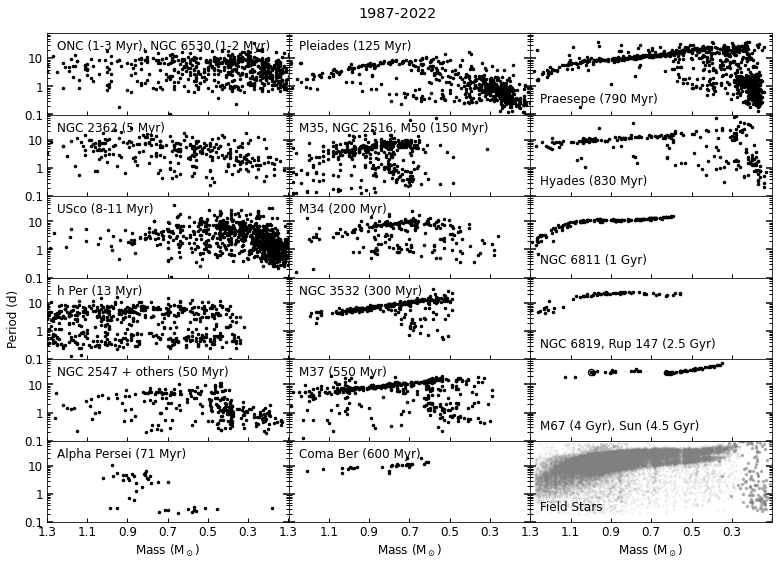

In [127]:
plot_evolution(max_year=2022)

In [145]:
def barnes_2003(max_year=2003):

    nrows,ncols = 2,4
    fig, axes_orig = plt.subplots(nrows=nrows,ncols=ncols,sharex=True,sharey=False,figsize=(13,9))
    axes = axes_orig#.T.flatten()
    print(axes)

    cluster_fontsize = 12
    textx0, texty0 = 0.41, 28 #22

    # gr_color = "C1"
    gb_color = "k"
    sg_color = "k"
    new_color = "k"# "C0"

    # ms=1.5

    grc_params = {"ms":2}
    need_params = {"ms":3,"mfc":"none","mew":0.75}
    
    fig.suptitle(f"1987-{max_year}",y=0.92)
    

    # For now, just replicating Barnes 2003
    axes[0,0].plot(pm_vi_bv(ic2391["V-I"]), ic2391_per, 'o',color=new_color,**need_params)
    axes[0,0].plot(ic2602["B-V"], ic2602_per, 'o',color=new_color,**need_params)
        
    axes[0,0].text(textx0,texty0,"IC 2391, IC 2602 (30 Myr*), ",fontsize=cluster_fontsize)


    axes[0,1].plot(ap_old_bv, ap_old_per, 'o',color=new_color,**need_params)
    axes[0,1].text(textx0,texty0,"Alpha Persei (50 Myr*)",fontsize=cluster_fontsize,color=new_color)


    axes[0,2].plot(plei_old_mass, plei_old_per, 'o',color=new_color,**need_params)
    axes[0,2].text(textx0,texty0,"Pleiades (100 Myr*)",fontsize=cluster_fontsize,color=gb_color)


    # TODO: update when I get those barnes periods
    axes[0,3].plot(m34_mass,m34_per,'o',color=new_color,**need_params)
    axes[0,3].text(textx0,texty0,"M34 (200 Myr)",fontsize=cluster_fontsize,color=new_color)

    
    axes[1,0].plot(ngc3532["(B-V)0"][::3],ngc3532_per[::3],'o',color=new_color,**need_params)
    axes[1,0].text(textx0,texty0,"NGC 3532 (300 Myr)",fontsize=cluster_fontsize,color=new_color)

    
    cb = old["citekey"]=="radick1990"
    axes[1,1].plot(old["B-V"][cb],old["Prot (d)"][cb],'o',color=new_color,**need_params)
    hy = old["citekey"]=="radick1987"
    axes[1,1].plot(old["B-V"][hy],old["Prot (d)"][hy],'o',color=new_color,**need_params)
    axes[1,1].text(textx0,texty0,"Coma Ber, Hyades (600 Myr*)",fontsize=cluster_fontsize,color=new_color)


    # old OCs, Sun, field
    textx1, texty1 = 0.5, 1

    axes[1,2].plot(baliunas["B-V"][baliunas["Population"]=="Young"],
                   baliunas["<Prot>"][baliunas["Population"]=="Young"],'o',color=new_color,**need_params)
    axes[1,2].text(textx1,texty1,"Young Mt Wilson (800 Myr)",fontsize=cluster_fontsize,color=new_color)

    axes[1,3].plot(baliunas["B-V"][baliunas["Population"]=="Old"],
                   baliunas["<Prot>"][baliunas["Population"]=="Old"],'o',color=new_color,**need_params)
    axes[1,3].text(textx1,texty1,"Old Mt Wilson (4.5 Gyr)",fontsize=cluster_fontsize,color=new_color)

    axes[1,3].plot([0.6],[27],'ro',ms=3)
    axes[1,3].plot([0.6],[27],'ro',ms=10,mfc="none")

    
    
    for i in range(2):
        for j in range(4):
            axes[i,j].set_ylim(-1,31)
    axes[1,3].set_ylim(-1,85)

    axes_orig[0,0].set_xlim(0.4,1.7)
    axes_orig[0,0].set_xticks(np.arange(0.4,1.7,0.1),minor=True)

#     axes_orig[0,0].set_ylim(-1,30)

    plt.subplots_adjust(hspace=0,wspace=0)

#     axes_orig[3,0].set_ylabel("Period (d)")
#     axes_orig[-1,0].set_xlabel(r"Mass (M$_\odot$)")
#     axes_orig[-1,0].set_xticks(np.arange(0.3,1.4,0.2))
#     axes_orig[-1,1].set_xlabel(r"Mass (M$_\odot$)")
#     axes_orig[-1,1].set_xticks(np.arange(0.3,1.4,0.2))
#     axes_orig[-1,2].set_xlabel(r"Mass (M$_\odot$)")
#     axes_orig[-1,2].set_xticks(np.arange(0.3,1.4,0.2))

#     # plt.savefig("cluster_periods_linear.pdf",bbox_inches="tight")

#     axes_orig[0,0].set_ylim(0.1,60)
#     axes_orig[0,0].set_yscale("log")
#     axes_orig[0,0].set_yticks([0.1,1,10])
#     axes_orig[0,0].set_yticklabels(["0.1","1","10"])



    # plt.savefig("cluster_periods_log.pdf",bbox_inches="tight")
    # plt.savefig("cluster_periods_log.png",bbox_inches="tight",dpi=300,facecolor="w")


[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


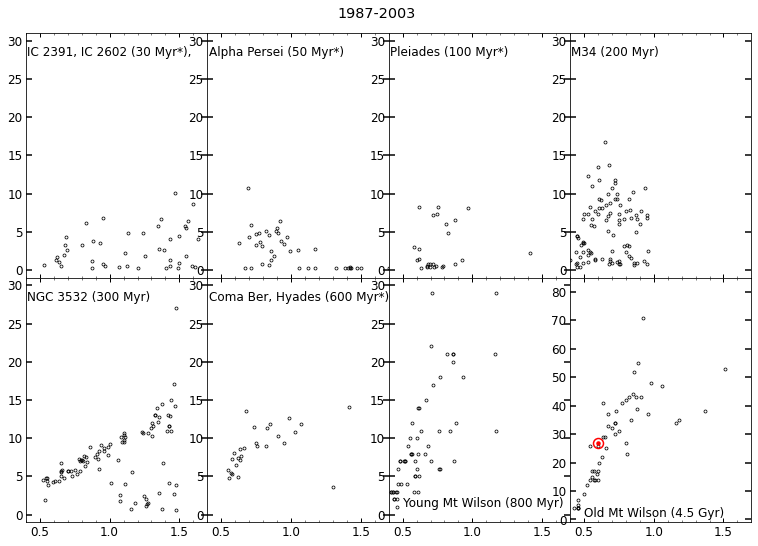

In [146]:
barnes_2003()

In [130]:
hy = old["citekey"]=="radick1987"
print(np.where(hy))

(array([113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135]),)


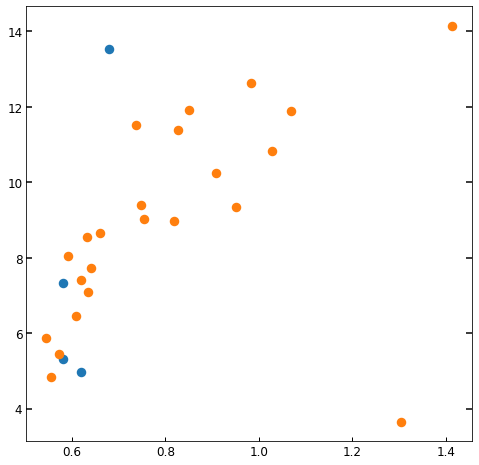

In [131]:
cb = old["citekey"]=="radick1990"
hy = old["citekey"]=="radick1987"
plt.plot(old["B-V"][cb],old["Prot (d)"][cb],'o')
plt.plot(old["B-V"][hy],old["Prot (d)"][hy],'o')


In [132]:
old[cb]

Name,SimbadName,Prot (d),Population,citekey,ads_ref,Notes,V,B,B-V,Mass
str19,str24,float64,str9,str25,str21,str77,float64,float64,float64,float64
T65,Cl Melotte 111 65,5.33,Coma Ber,radick1990,1990ApJ...353..524R,--,9.029999732971191,9.609999656677246,0.5799999237060547,1.0800001907348633
T76,Cl Melotte 111 76,4.97,Coma Ber,radick1990,1990ApJ...353..524R,--,9.0,9.619999885559082,0.619999885559082,1.0322223493787979
T85,Cl Melotte 111 85,7.34,Coma Ber,radick1990,1990ApJ...353..524R,--,9.3100004196167,9.890000343322754,0.5799999237060547,1.0800001907348633
T132,Cl Melotte 111 132,13.53,Coma Ber,radick1990,1990ApJ...353..524R,--,9.90999984741211,10.59000015258789,0.6800003051757812,0.9799998474121093


In [133]:
old[hy]

Name,SimbadName,Prot (d),Population,citekey,ads_ref,Notes,V,B,B-V,Mass
str19,str24,float64,str9,str25,str21,str77,float64,float64,float64,float64
VB 65,Cl Melotte 25 65,5.87,Hyades,radick1987,1987ApJ...321..459R,--,7.4039998054504395,7.948999881744385,0.5450000762939453,1.1549998728434245
VB 59,Cl Melotte 25 59,4.83,Hyades,radick1987,1987ApJ...321..459R,--,7.4720001220703125,8.027000427246094,0.5550003051757812,1.1383328247070312
VB 31,Cl Melotte 25 31,5.45,Hyades,radick1987,1987ApJ...321..459R,--,7.443999767303467,8.015999794006348,0.5720000267028809,1.0999999332427979
VB 52,Cl Melotte 25 52,8.05,Hyades,radick1987,1987ApJ...321..459R,--,7.789999961853027,8.381999969482422,0.5920000076293945,1.063999989827474
VB 50,Cl Melotte 25 50,7.1,Hyades,radick1987,1987ApJ...321..459R,--,7.583000183105469,8.217000007629395,0.6339998245239258,1.0171430451529366
VB 102,Cl Melotte 25 102,6.46,Hyades,radick1987,1987ApJ...321..459R,--,7.545000076293945,8.152999877929688,0.6079998016357422,1.0455557759602865
VB 73,Cl Melotte 25 73,7.41,Hyades,radick1987,1987ApJ...321..459R,--,7.836999893188477,8.456000328063965,0.6190004348754883,1.0333328501383463
VB 63,Cl Melotte 25 63,7.73,Hyades,radick1987,1987ApJ...321..459R,--,8.050000190734863,8.6899995803833,0.6399993896484375,1.0107149396623885
VB 97,Cl Melotte 25 97,8.55,Hyades,radick1987,1987ApJ...321..459R,--,7.8979997634887695,8.529999732971191,0.6319999694824219,1.0192857469831194
